In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test['Survived']=0
combined_train_test=train.append(test)

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


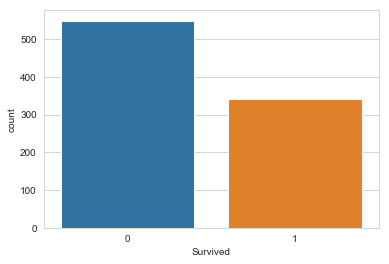

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

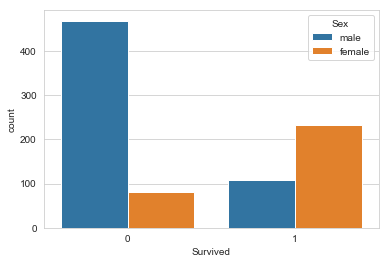

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train)

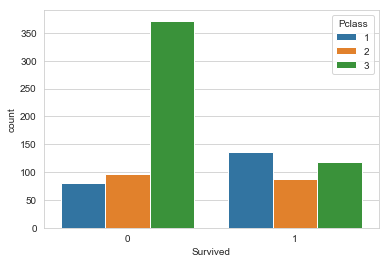

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train)

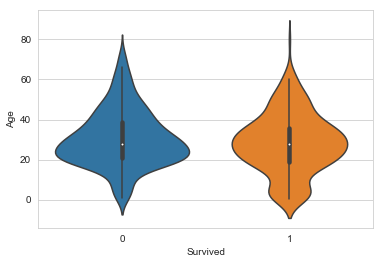

In [9]:
sns.violinplot(x='Survived',y="Age", data=train)

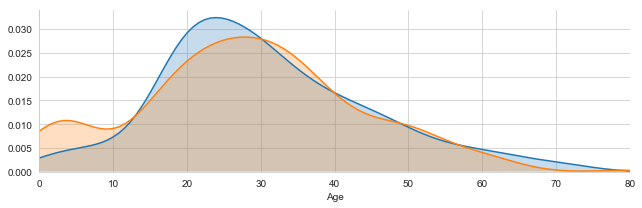

In [10]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/beingcshen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


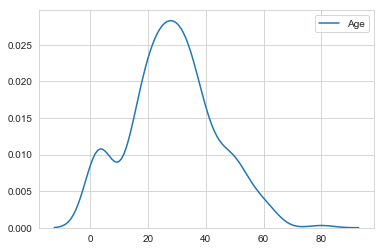

In [11]:
sns.kdeplot(train[train.Survived==1]['Age'])

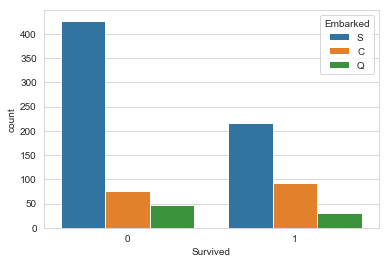

In [12]:
sns.countplot(x='Survived', hue='Embarked', data=train)

Embarked fill by mode, dummy

In [13]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [14]:
pd.factorize(combined_train_test['Embarked'])[0]

array([0, 1, 0, ..., 0, 0, 1])

In [15]:
combined_train_test[['Embarked']].columns[0]

'Embarked'

In [16]:
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix='Embarked')
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [17]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1


# Gender

In [18]:
gen_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, gen_dummies_df], axis =1)

In [19]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1,0,1


# Name

In [20]:
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [21]:
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

In [22]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

# Fare

In [23]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [24]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [25]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)


In [26]:
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

# Pclass

In [27]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

# Sib Par

In [28]:
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1

In [29]:
combined_train_test[['Age','Title', 'Parch', 'SibSp', 'Pclass']].describe()

,Age,Title,Parch,SibSp,Pclass
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,0.910619,0.385027,0.498854,0.669977
std,14.413493,1.680647,0.865560,1.041658,0.803009
min,0.170000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,2.000000,0.000000,1.000000,1.000000
max,80.000000,17.000000,9.000000,8.000000,2.000000


In [30]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 22 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Sex_female     1309 non-null uint8
Sex_male       1309 non-null uint8
Title          1309 non-null int64
Name_length    1309 non-null int64
Fare_bin       1309 non-null category
Fare_bin_id    1309 non-null int64
Family_Size    1309 non-null int64
dtypes: category(1), float64(2), int64(9), object(5), uint8(5)
memory usage: 221.6+ KB


# Age

In [31]:
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = combined_train_test[['Age','Title', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(combined_train_test['Age'].notnull())]
age_df_isnull = age_df.loc[(combined_train_test['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

In [32]:
age_df_isnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 5 to 417
Data columns (total 5 columns):
Age       0 non-null float64
Title     263 non-null int64
Parch     263 non-null int64
SibSp     263 non-null int64
Pclass    263 non-null int64
dtypes: float64(1), int64(4)
memory usage: 12.3 KB


In [33]:
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=40)
RFR.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
predictAges = RFR.predict(age_df_isnull.values[:,1:])
combined_train_test.loc[combined_train_test['Age'].isnull(), ['Age']]= predictAges

In [35]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]


# Cabin

In [36]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

In [37]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title,Name_length,Fare_bin,Fare_bin_id,Family_Size,Ticket_Letter
0,22.0,0,S,7.25000,"Braund, Mr. Owen Harris",0,1,0,male,1,...,0,1,0,1,0,23,"(7.229, 7.896]",0,2,0
1,38.0,1,C,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,0,1,0,1,51,"(26.277, 128.082]",1,2,1
2,26.0,0,S,7.92500,"Heikkinen, Miss. Laina",0,3,0,female,0,...,0,1,1,0,2,22,"(7.896, 10.5]",2,1,2
3,35.0,1,S,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,1,1,0,1,44,"(26.277, 128.082]",1,2,3
4,35.0,0,S,8.05000,"Allen, Mr. William Henry",0,5,0,male,0,...,0,1,0,1,0,24,"(7.896, 10.5]",2,1,3


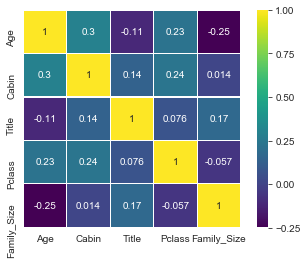

In [38]:
corr = combined_train_test[['Age','Cabin','Embarked','Title','Pclass','Family_Size']].corr()
colormap = plt.cm.viridis
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


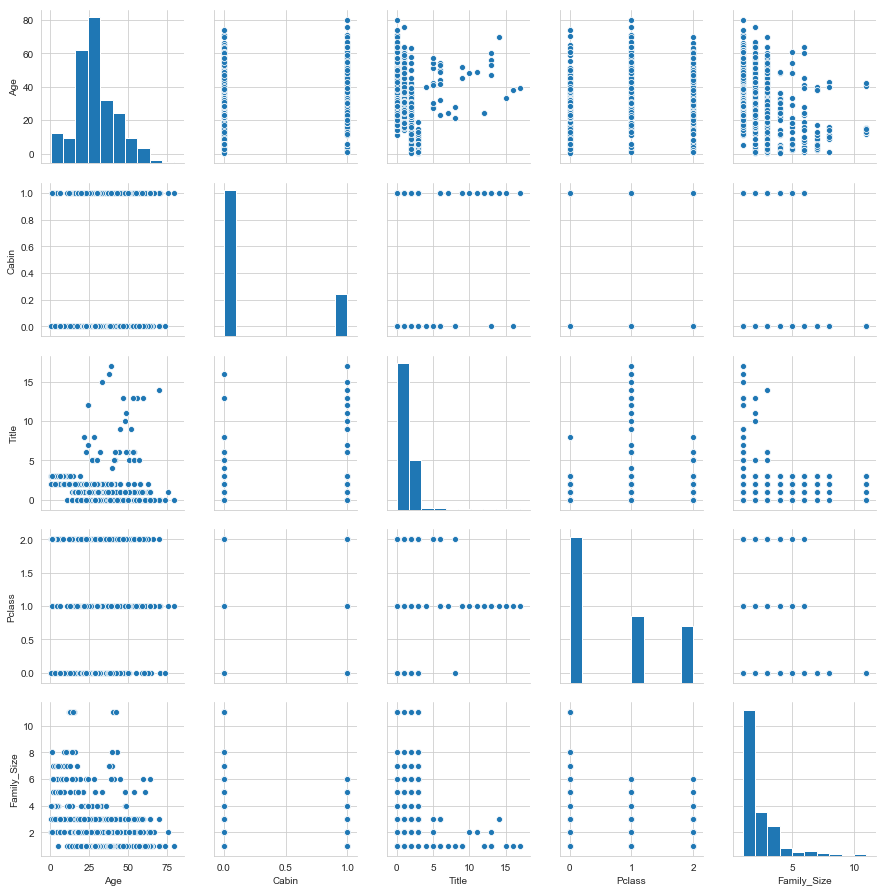

In [39]:
sns.pairplot(combined_train_test[['Age','Cabin','Embarked','Title','Pclass','Family_Size']], palette = 'seismic')

# Normalization

In [40]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare', 'Name_length','Family_Size','Fare_bin_id','Ticket_Letter']])

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [41]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title',
       'Name_length', 'Fare_bin', 'Fare_bin_id', 'Family_Size',
       'Ticket_Letter'],
      dtype='object')

In [42]:
combined_train_test[['Age','Fare', 'Name_length','Family_Size','Fare_bin_id','Ticket_Letter']] = scale.transform(combined_train_test[['Age','Fare', 'Name_length','Family_Size','Fare_bin_id','Ticket_Letter']])

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [43]:
combined_data_backup = combined_train_test
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 
                       'Parch', 'SibSp', 'Fare_bin', 'Ticket'],axis=1,inplace=True)


In [44]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [45]:
titanic_train_data_X.head()

,Age,Cabin,Fare,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Name_length,Fare_bin_id,Family_Size,Ticket_Letter
0,-0.566173,0,-0.554177,0,0,0,1,0,1,-0.434672,-1.374977,0.073352,-0.712692
1,0.621944,1,1.541869,1,1,0,0,1,0,2.511806,-0.678712,0.073352,-0.589713
2,-0.269143,0,-0.504344,0,0,0,1,1,0,-0.539904,0.017553,-0.558346,-0.466735
3,0.399172,1,0.870667,1,0,0,1,1,0,1.775186,-0.678712,0.073352,-0.343757
4,0.399172,0,-0.495116,0,0,0,1,0,1,-0.329441,0.017553,-0.558346,-0.343757


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection


# Model selection

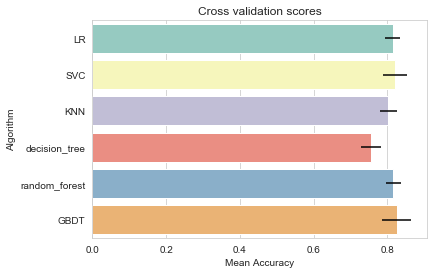

In [59]:
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=80)
gbdt = GradientBoostingClassifier(n_estimators=80,learning_rate=0.03,max_depth=5)
#xgbGBDT = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
clfs = [lr, svc, knn, dt, rf, gbdt]

kfold = 10
cv_results = []
for classifier in clfs :
    cv_results.append(cross_val_score(classifier, titanic_train_data_X, titanic_train_data_Y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LR","SVC",'KNN','decision_tree',"random_forest","GBDT"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")



In [60]:
cv_means

[0.8136908409942117,
 0.8215687776642833,
 0.8025556123028033,
 0.7542883895131086,
 0.8159249801384633,
 0.8249012597889003]

In [66]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)